<a href="https://colab.research.google.com/github/yuna1998/statistic-class/blob/main/dplyr_class_20210318.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pipes

In [3]:
library(tidyverse)

In [21]:
install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [22]:
library(nycflights13)


In [23]:
flights[1:5,]

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00


In [24]:
flights %>% filter( month==4 & day ==13) %>% head(3)
## my birthday


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,4,13,59,2359,60,443,343,60,B6,707,N621JB,JFK,SJU,203,1598,23,59,2013-04-13 23:00:00
2013,4,13,100,2130,210,352,16,216,B6,383,N657JB,LGA,FLL,149,1076,21,30,2013-04-13 21:00:00
2013,4,13,458,500,-2,640,640,0,US,1431,N180US,EWR,CLT,86,529,5,0,2013-04-13 05:00:00


In [26]:
filter(flights, month==4, day ==13) %>% head(3)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,4,13,59,2359,60,443,343,60,B6,707,N621JB,JFK,SJU,203,1598,23,59,2013-04-13 23:00:00
2013,4,13,100,2130,210,352,16,216,B6,383,N657JB,LGA,FLL,149,1076,21,30,2013-04-13 21:00:00
2013,4,13,458,500,-2,640,640,0,US,1431,N180US,EWR,CLT,86,529,5,0,2013-04-13 05:00:00


In [27]:
flights %>% filter(month ==4 , day == 13) %>% filter(air_time >= 100) %>% head()
## 장거리 여행이 하고싶어, arr_time이 100 넘는 것을 설정함

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,4,13,59,2359,60,443,343,60,B6,707,N621JB,JFK,SJU,203,1598,23,59,2013-04-13 23:00:00
2013,4,13,100,2130,210,352,16,216,B6,383,N657JB,LGA,FLL,149,1076,21,30,2013-04-13 21:00:00
2013,4,13,516,515,1,800,802,-2,UA,1545,N37281,EWR,IAH,201,1400,5,15,2013-04-13 05:00:00
2013,4,13,526,530,-4,816,812,4,UA,646,N589UA,LGA,IAH,209,1416,5,30,2013-04-13 05:00:00
2013,4,13,543,540,3,900,840,20,AA,701,N613AA,JFK,MIA,172,1089,5,40,2013-04-13 05:00:00
2013,4,13,545,545,0,953,927,26,B6,709,N531JB,JFK,SJU,230,1598,5,45,2013-04-13 05:00:00


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



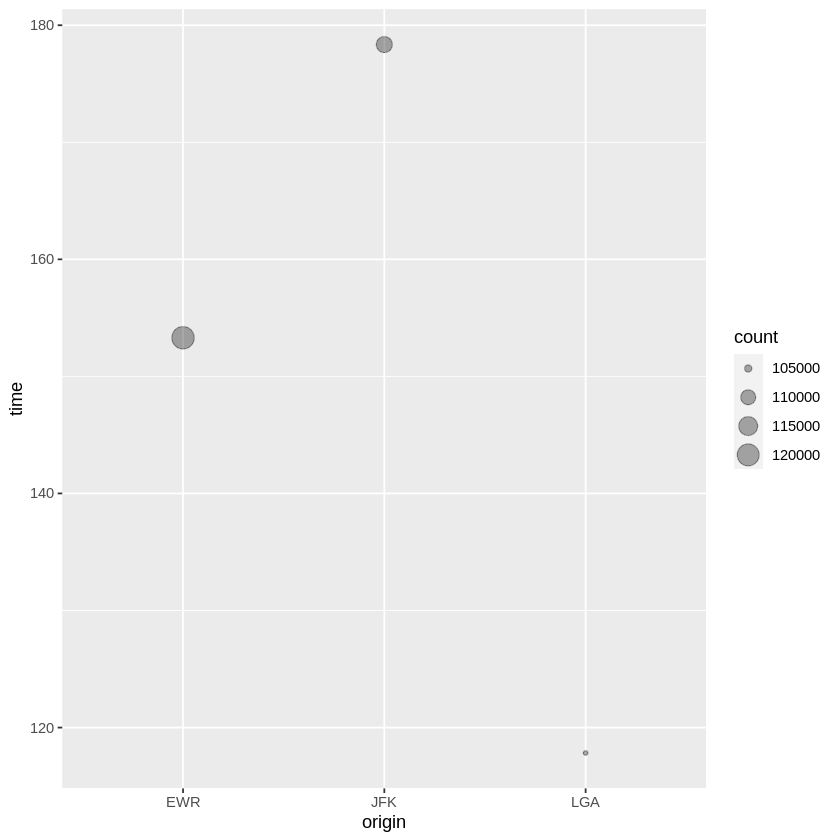

In [45]:
flights %>% group_by(origin) %>%
    summarise(count = n(), time = mean(air_time, na.rm = TRUE), delay = mean(arr_delay, na.rm = TRUE)) %>%
ggplot(mapping = aes(x = origin, y = time)) +
    geom_point(aes(size = count), alpha = 1/3) +
    geom_smooth(se=FALSE)

In [40]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [41]:
library(ggplot2)

Warning message:
“Removed 9430 rows containing missing values (geom_point).”


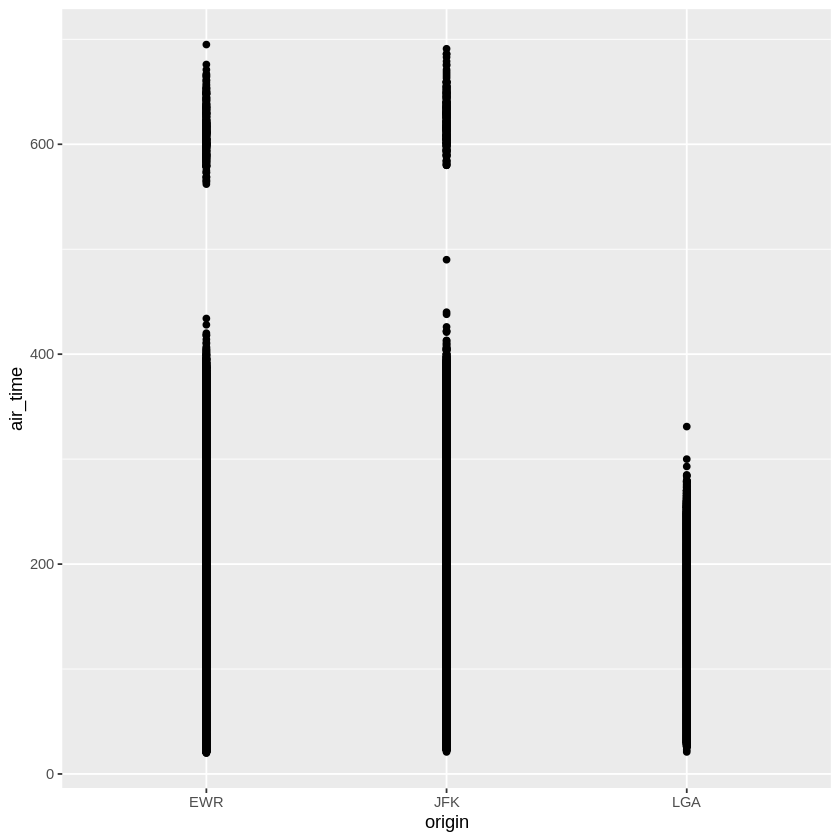

In [43]:
ggplot(data = flights) +
    geom_point(mapping = aes(x = origin, y = air_time))

In [34]:
flights_latlon <- flights %>% 
 inner_join(select(airports, origin = faa, origin_lat = lat, origin_lon = lon),
  by = "origin") %>% 
 inner_join(select(airports, dest = faa, dest_lat = lat, dest_lon = lon),
  by = "dest")

flights_latlon %>%
   print(n = 6, width = Inf)

# A tibble: 329,174 x 23
   year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
  <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1  2013     1     1      517            515         2      830            819
2  2013     1     1      533            529         4      850            830
3  2013     1     1      542            540         2      923            850
4  2013     1     1      554            600        -6      812            837
5  2013     1     1      554            558        -4      740            728
6  2013     1     1      555            600        -5      913            854
  arr_delay carrier flight tailnum origin dest  air_time distance  hour minute
      <dbl> <chr>    <int> <chr>   <chr>  <chr>    <dbl>    <dbl> <dbl>  <dbl>
1        11 UA        1545 N14228  EWR    IAH        227     1400     5     15
2        20 UA        1714 N24211  LGA    IAH        227     1416     5     29
3        33 AA        1141 N619AA  

In [35]:
library(maps)

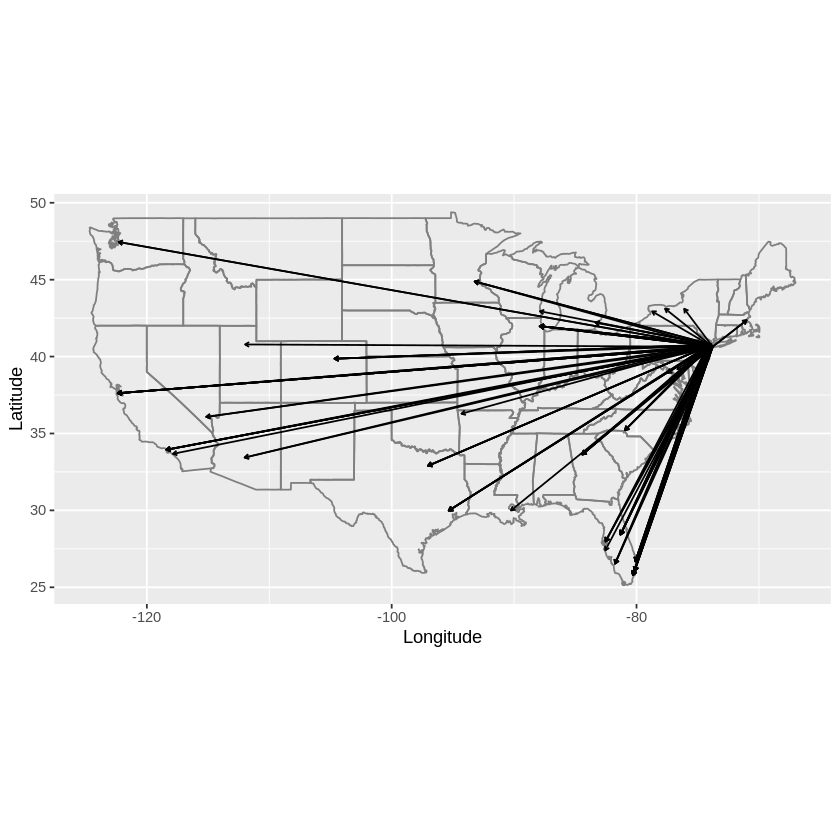

In [36]:
flights_latlon %>%
 slice(1:100) %>% 
 ggplot(aes(x = origin_lon, xend = dest_lon,
            y = origin_lat, yend = dest_lat)) +
 borders("state") + geom_segment(arrow = arrow(length = unit(0.1, "cm"))) + 
 coord_quickmap() + 
 labs(y = "Latitude", x = "Longitude")